In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_directory='Birds/train'
test_directory='Birds/test'
val_directory='Birds/valid'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [5]:
  # useful for getting number of classes
folders = glob('Birds/train/*')
len(folders)

225

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 31316 images belonging to 225 classes.
Found 1125 images belonging to 225 classes.


In [10]:
print(len(training_set))
print(len(test_set))

979
36


In [11]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\HP\AppData\Local\Temp\ipykernel_13856\563002667.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25


979/979 [==============================] - 1838s 2s/step - loss: 4.0562 - accuracy: 0.3880 - val_loss: 1.7492 - val_accuracy: 0.6969
Epoch 2/25
979/979 [==============================] - 1806s 2s/step - loss: 2.1299 - accuracy: 0.6452 - val_loss: 1.4039 - val_accuracy: 0.7520
Epoch 3/25
979/979 [==============================] - 2121s 2s/step - loss: 1.7328 - accuracy: 0.7132 - val_loss: 1.5194 - val_accuracy: 0.7582
Epoch 4/25
979/979 [==============================] - 1921s 2s/step - loss: 1.4772 - accuracy: 0.7595 - val_loss: 1.9354 - val_accuracy: 0.7627
Epoch 5/25
979/979 [==============================] - 1827s 2s/step - loss: 1.2495 - accuracy: 0.7929 - val_loss: 1.6091 - val_accuracy: 0.7796
Epoch 6/25
979/979 [==============================] - 1821s 2s/step - loss: 1.0815 - accuracy: 0.8203 - val_loss: 1.5127 - val_accuracy: 0.7884
Epoch 7/25
979/979 [==============================] - 1815s 2s/step - loss: 1.0009 - accuracy: 0.8358 - val_loss: 1.8928 - val_accurac

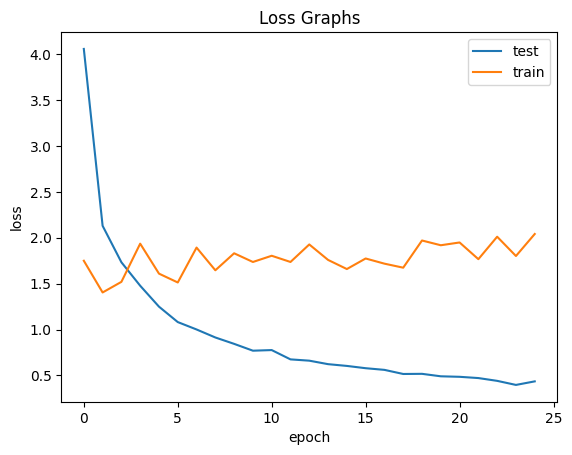

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Loss Graphs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['test', 'train'], loc='upper right')
plt.show()

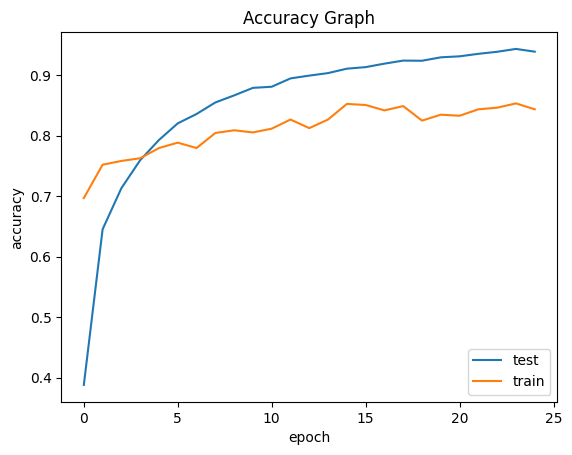

In [13]:
#accuries
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['test', 'train'], loc='lower right')
plt.show()

In [14]:
model.save('BC.h5')

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./BC.h5',compile=False)  

In [16]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [17]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 202ms/step


'AMERICAN AVOCET'

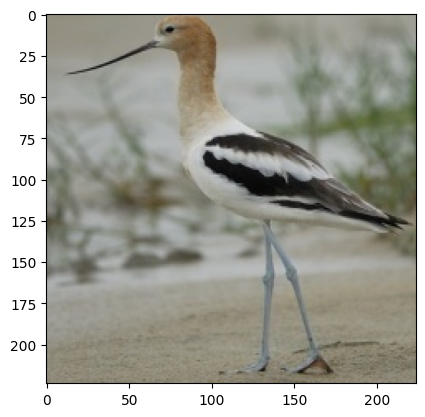

In [20]:
img='Birds/valid/AMERICAN AVOCET/3.jpg'
pic=load_img('Birds/valid/AMERICAN AVOCET/3.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [21]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.15.0
2.15.0
